<a href="https://colab.research.google.com/github/CHUUHYESEUNG/Tensorflow_Practice/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_mnist_SVM_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_52221092_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9C%B5%ED%95%A9_%EC%9E%A5%ED%98%9C%EC%8A%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터사이언스 Term Project
1. Aim
- SVM의 특성과 성능을 파악
- MNIST데이타셋을 이용하여 binary classification을 수행
2. To do
• Implement the SVM
- Dataset : MNIST데이타셋
(참고사이트 :
https://keras.io/examples/vision/mnist_convnet/
https://datasetsearch.research.google.com/search?query=mnist&docid=L2cvMTFqbno1eTZtcg%3D%3D
)
- 0~9로 이루어진 데이타셋에서 0, 9만을 추출해서 binary classification을 수행
- 아래와 같은 항목에 수행한 후 각각의 수행결과를 제시하고 아울러, Confusion
Matrix와 ROC/AUC를 제시
(1) SVM with soft margin with varying the parameter C
(2) SVM with kernel trick with at least four different kernel functions
3. Platform for Implementation
You can implement the algorithm using the language and platform of your choice.



---



In [ ]:
!python --version

Python 3.8.12


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. mnist dataset을 불러오고, 출력해봅니다. 

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version= 1 )
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x, y = mnist['data'], mnist['target']
print("X shape :", x.shape)
print("Y shape :", y.shape)

X shape : (70000, 784)
Y shape : (70000,)


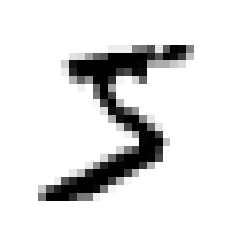

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

2. MNIST 데이터 셋에서 0 또는 9가 포함되어 있는 데이터 추출

In [ ]:
import numpy as np

# 데이터 라벨 출력(중복되지 않은 것)
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
# 0과 9에 대한 데이터가 위치한 index를 추출
# 실제로 해당 index에 원하는 레이블(0 또는 9)가 포함된건지 확인하기 위해서 [index, value] 형태로 값을 받아서 출력함
idx_0_or_9 = []
for i, val in enumerate(y):
    if y[i] == '0' or y[i] =='9': idx_0_or_9.append([i, val])

print(idx_0_or_9)

[[1, '0'], [4, '9'], [19, '9'], [21, '0'], [22, '9'], [33, '9'], [34, '0'], [37, '0'], [43, '9'], [45, '9'], [48, '9'], [51, '0'], [54, '9'], [56, '0'], [57, '9'], [63, '0'], [68, '0'], [69, '0'], [75, '0'], [80, '9'], [81, '0'], [87, '9'], [88, '0'], [95, '0'], [108, '0'], [110, '9'], [114, '0'], [116, '9'], [118, '0'], [119, '0'], [121, '0'], [133, '9'], [153, '9'], [154, '9'], [156, '0'], [162, '9'], [167, '9'], [169, '0'], [170, '9'], [172, '9'], [176, '9'], [183, '9'], [192, '0'], [195, '9'], [206, '0'], [209, '0'], [210, '0'], [216, '0'], [226, '9'], [227, '9'], [229, '0'], [232, '0'], [234, '0'], [246, '0'], [247, '9'], [249, '0'], [260, '0'], [264, '9'], [267, '9'], [280, '9'], [282, '9'], [283, '0'], [285, '9'], [293, '0'], [296, '0'], [303, '0'], [304, '9'], [313, '9'], [319, '9'], [320, '0'], [322, '9'], [326, '0'], [334, '9'], [344, '9'], [346, '9'], [350, '9'], [359, '0'], [362, '9'], [364, '9'], [374, '9'], [383, '9'], [389, '9'], [399, '0'], [409, '9'], [419, '9'], [423,

In [ ]:
# 출력 결과를 보면 원하는 레이블만 추출된 것을 확인할 수 있음
# 앞에 숫자가 해당 레이블의 index를 의미한
# x에대해서 해당 index에 대한 값을 추출하면 0과 9에 해당하는 데이터만 추출할 수 있음
print(idx_0_or_9[:10])

# 새롭게 정답 데이터 정의('0', '9'만 포함되게끔)
# 총 13,861개
new_y = []
for _, idx in enumerate(idx_0_or_9):
    new_y.append(idx[1])
    
new_y = np.array(new_y)
print(new_y[:10], new_y.shape)

[[1, '0'], [4, '9'], [19, '9'], [21, '0'], [22, '9'], [33, '9'], [34, '0'], [37, '0'], [43, '9'], [45, '9']]
['0' '9' '9' '0' '9' '9' '0' '0' '9' '9'] (13861,)


3. 0과 9에 해당하는 데이터 추출하기

In [ ]:
# 위에서 정의한 idx_0_or_9변수에서 index만 추출
index = []
for _, idx in enumerate(idx_0_or_9):
    index.append(idx[0])

print(index)

[1, 4, 19, 21, 22, 33, 34, 37, 43, 45, 48, 51, 54, 56, 57, 63, 68, 69, 75, 80, 81, 87, 88, 95, 108, 110, 114, 116, 118, 119, 121, 133, 153, 154, 156, 162, 167, 169, 170, 172, 176, 183, 192, 195, 206, 209, 210, 216, 226, 227, 229, 232, 234, 246, 247, 249, 260, 264, 267, 280, 282, 283, 285, 293, 296, 303, 304, 313, 319, 320, 322, 326, 334, 344, 346, 350, 359, 362, 364, 374, 383, 389, 399, 409, 419, 423, 424, 427, 428, 429, 434, 435, 440, 441, 451, 453, 458, 460, 462, 464, 471, 473, 482, 487, 489, 501, 519, 520, 524, 525, 526, 527, 529, 542, 550, 566, 577, 580, 582, 583, 589, 595, 596, 600, 601, 603, 612, 621, 626, 631, 633, 639, 641, 656, 662, 666, 667, 668, 669, 687, 689, 702, 704, 707, 709, 712, 727, 733, 741, 743, 744, 745, 755, 763, 764, 772, 776, 781, 782, 787, 788, 790, 793, 800, 806, 812, 818, 822, 825, 826, 827, 849, 859, 860, 864, 869, 872, 887, 889, 900, 902, 903, 927, 929, 930, 932, 940, 943, 949, 952, 957, 965, 974, 979, 980, 984, 997, 1000, 1005, 1015, 1018, 1027, 1028, 1029

In [ ]:
# 추출한 index를 토대로 x에서 원하는 data만 추출
data_0_or_9 = []
for _, idx in enumerate(index):
    data_0_or_9.append(x.values[idx])
    
new_x = np.array(data_0_or_9)

print(new_x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 추출된 데이터 개수 (13,861로 정답과 동일)
print(new_x.shape, new_y.shape)

(13861, 784) (13861,)


-------------------------------------------------------

- confusion matrix 행 : 실제 클래스
- confusion matrix 열 : 예측한 클래스

4. 라이브러리 불러오기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

import pandas as pd

5. 훈련 및 테스트 데이터 생성

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new_x, new_y, test_size = 0.25, random_state = 0)

6. SVM Model

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

7. CONFUSION MATRIX & ROC/AUC

In [ ]:
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print(cm)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("ROC/AUC: {:.2f} %".format(roc_auc_score(y_test, y_pred)*100))

[[1746   16]
 [  12 1692]]
Accuracy: 99.18 %
Standard Deviation: 0.26 %
ROC/AUC: 99.19 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


------------------------------------------------------------

7. Plot SVM Classifier(버전 문제로 실패)

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.8/site-packages
Requires: numpy, joblib, scipy, threadpoolctl
Required-by: 


* **굵은 텍스트** DecisionBoundaryDisplay import 안 되는 문제

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets

import matplotlib.pyplot as plt

ImportError: ignored